##Ejercicio *Web Scraping* de unos productos de Amazon
###Ela Katherine Shepherd Arévalo

Queremos hacer Web Scraping de la página resultante de buscar en amazon.es "tarjeta gráfica", poner un filtro de precio entre 50-100 euros, y ordenar por valoraciones de los clientes.
Insertaremos en un .csv la información de los 10 primeros resultados.

Utilizaremos la librería BeautifulSoup, que nos permitirá extraer la información de un documento HTML; y la librería pandas para meter la información en una estructura legible

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
#Esto nos servirá para que al scrapear se nos vea como una persona y no un bot (obtenido gracias a https://developers.whatismybrowser.com/)
HEADERS = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36",
           "Accept-Language": "en-US, en;q=0.5",
           }

In [4]:
#URL es la url de la página de amazon con la búsqueda filtrada de tarjetas gráficas
URL = "https://www.amazon.es/s?k=tarjeta+gr%C3%A1fica&i=computers&rh=n%3A667049031%2Cp_36%3A1323857031&s=review-rank&dc&qid=1645183892&rnid=1323854031&sprefix=tarjeta+gr%C3%A1f%2Caps%2C99&ref=sr_st_review-rank"
webpage = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(webpage.content, "lxml")

In [57]:
#De esta manera vemos si el html resultante es el que queremos (y no uno donde indique que se te ha bloqueado)

#DESCOMENTAR PARA VER EL HTML
#soup.prettify()

In [50]:
#Ahora indicamos que queremos, entre otras cosas, buscar todos aquellos elementos "span" (etiqueta de HTML)
#que sean de la clase "a-price-whole", que son los precios de los productos. 

products = soup.find_all("span", attrs={"class": "a-size-medium a-color-base a-text-normal"})
prices = soup.find_all("span", attrs={"class": "a-price-whole"})
valoracion = soup.find_all("span", attrs={"class": "a-icon-alt"})

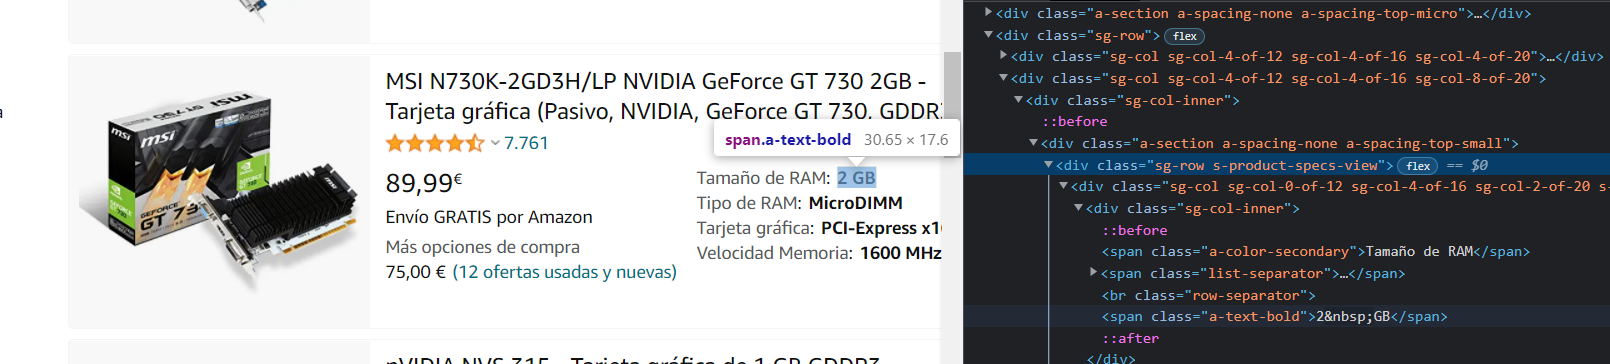

In [51]:
#Para las características de la tarjeta necesitamos hacer una búsqueda anidada: ciertos
#elementos "span" que son hijos de otros ciertos elementos "div" corresponden con las características, como vemos en la imagen
lista_tamRAM = []
lista_tipoRAM = []
lista_tar_graf = []
lista_velocidad = []
i = 0
for itemText in soup.find_all('div', attrs={'class':'sg-row s-product-specs-view'}):
    for x in itemText.find_all('span',attrs={"class": "a-text-bold"}):
      #Como los elementos van seguidos y van en bloques de cuatro en cuatro (tamaño RAM, tipo RAM, Tarjeta Gráfica y Velocidad),
      #vamos insertándolos en las listas creadas de manera intercalada
      if (i%4 == 0):
        lista_tamRAM.append(x.get_text().strip())
      elif (i%4 == 1):
        lista_tipoRAM.append(x.get_text().strip())
      elif (i%4 == 2):
        lista_tar_graf.append(x.get_text().strip())
      else:
        lista_velocidad.append(x.get_text().strip())
      i = i + 1

In [52]:
#Esto es para crear listas de los nombres de los productos, precios y valoraciones. 
lista_productos = []
lista_precios = []
lista_valoraciones = []
i = 0
for x in products:
  if (i < 10):
      lista_productos.append(x.get_text().strip())
  i = i + 1
i = 0
for x in prices:
  if (i < 10):
      lista_precios.append(x.get_text().strip())
  i = i + 1
i = 0
for x in valoracion:
  if (i < 10):
      lista_valoraciones.append(x.get_text().strip())
  i = i + 1

In [54]:
#Creamos un nuevo dataframe de pandas donde las columnas que nos interesan son los elementos de las distintas listas que hemos desarrollado
df = pd.DataFrame()
df["Nombre"] = lista_productos
df["Precio"] = lista_precios
df["Valoracion"] = lista_valoraciones
df["Tamaño RAM"] = lista_tamRAM[:10]
df["Tipo RAM"] = lista_tipoRAM[:10]
df["Tarjeta grafica"] = lista_tar_graf[:10]
df["Velocidad"] = lista_velocidad[:10]

In [55]:
#Mostramos el dataframe
df

,Nombre,Precio,Valoracion,Tamaño RAM,Tipo RAM,Tarjeta grafica,Velocidad
0,Asus GT730-SL - Tarjeta gráfica de 2 GB GDDR5 ...,"89,99","4,6 de 5 estrellas",2048,caché L2,PCI-E,0 MHz
1,MSI N730K-2GD3H/LP NVIDIA GeForce GT 730 2GB -...,"139,00","4,5 de 5 estrellas",2 GB,MicroDIMM,PCI-Express x16,1600 MHz
2,MSI N210-MD1G/D3 GeForce 210 1GB GDDR3 - Tarje...,"79,91","4,4 de 5 estrellas",1 GB,DDR3 SDRAM,PCI-E,1000 MHz
3,ASUS GT1030-2G-BRK - Tarjeta gráfica (GeForce ...,"85,70","4,4 de 5 estrellas",2 GB,DDR5 SDRAM,PCI-E,1200 MHz
4,Palit NEAT7300HD46H - Tarjeta gráfica (PCI-E G...,"89,84","4,3 de 5 estrellas",2048 MB,DDR3 SDRAM,PCI-E,7010 MHz
5,Lian Li O11DXL-1X no Compatible con RTX 3080/3...,"91,59","4,3 de 5 estrellas",-,DDR4 SDRAM,PCI-Express x16,1
6,MSI - N730K-2GD3H/LPV1 - Tarjeta Gráfica Profe...,"72,99","4,3 de 5 estrellas",2 GB,L2 cache,PCI-Express x16,902 MHz
7,Hauppauge Impact VCB - Tarjeta Interna de sint...,"91,59","4,3 de 5 estrellas",-,-,PCI-E,-
8,EZDIY-FAB Soporte vertical para tarjetas gráfi...,"72,99","5,0 de 5 estrellas",0,PC2-4200,PCI-E,0
9,Gigabyte Technology GV-N730D5-2GL GeForce GT 7...,"92,69","4,1 de 5 estrellas",-,L2 cache,AGP,-


In [56]:
#Pasamos el dataframe a un .csv
df.to_csv('Amazon_TG_info.csv', index=False)  